In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loyal = pd.read_csv('loyalty.csv')

In [3]:
loyal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1246 entries, 0 to 1245
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customer_id           1246 non-null   int64  
 1   spend                 1246 non-null   float64
 2   first_month           1246 non-null   object 
 3   items_in_first_month  1246 non-null   int64  
 4   region                1246 non-null   object 
 5   loyalty_years         1246 non-null   object 
 6   joining_month         1121 non-null   object 
 7   promotion             1246 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 78.0+ KB


In [4]:
loyal.head()

,customer_id,spend,first_month,items_in_first_month,region,loyalty_years,joining_month,promotion
0,1,132.68,15.3,5,Asia/Pacific,5-10,Nov,No
1,2,106.45,16.2,14,Asia/Pacific,0-1,Feb,Yes
2,3,123.16,25.26,7,Middle East/Africa,10+,Dec,Yes
3,4,130.60,24.74,8,Middle East/Africa,3-5,Apr,No
4,5,130.41,25.59,8,Middle East/Africa,3-5,Apr,Yes


In [5]:
clean_data = loyal.copy()

In [6]:
clean_data.head()

,customer_id,spend,first_month,items_in_first_month,region,loyalty_years,joining_month,promotion
0,1,132.68,15.3,5,Asia/Pacific,5-10,Nov,No
1,2,106.45,16.2,14,Asia/Pacific,0-1,Feb,Yes
2,3,123.16,25.26,7,Middle East/Africa,10+,Dec,Yes
3,4,130.60,24.74,8,Middle East/Africa,3-5,Apr,No
4,5,130.41,25.59,8,Middle East/Africa,3-5,Apr,Yes


In [7]:
clean_data.isnull().sum()

customer_id               0
spend                     0
first_month               0
items_in_first_month      0
region                    0
loyalty_years             0
joining_month           125
promotion                 0
dtype: int64

In [8]:
clean_data.duplicated().sum()

0

In [9]:
clean_data

,customer_id,spend,first_month,items_in_first_month,region,loyalty_years,joining_month,promotion
0,1,132.68,15.3,5,Asia/Pacific,5-10,Nov,No
1,2,106.45,16.2,14,Asia/Pacific,0-1,Feb,Yes
2,3,123.16,25.26,7,Middle East/Africa,10+,Dec,Yes
3,4,130.60,24.74,8,Middle East/Africa,3-5,Apr,No
4,5,130.41,25.59,8,Middle East/Africa,3-5,Apr,Yes
...,...,...,...,...,...,...,...,...
1241,1242,126.01,15.97,14,Americas,1-3,NaN,Yes
1242,1243,111.85,21.22,9,Asia/Pacific,0-1,Jan,No
1243,1244,132.51,16.23,9,Middle East/Africa,5-10,Aug,No
1244,1245,131.57,21.21,9,Americas,1-3,NaN,No


In [10]:
clean_data['spend'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1246 entries, 0 to 1245
Series name: spend
Non-Null Count  Dtype  
--------------  -----  
1246 non-null   float64
dtypes: float64(1)
memory usage: 9.9 KB


In [11]:
clean_data['spend'].nunique()

861

In [12]:
clean_data['spend'].isnull().sum()

0

In [13]:
clean_data['first_month'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1246 entries, 0 to 1245
Series name: first_month
Non-Null Count  Dtype 
--------------  ----- 
1246 non-null   object
dtypes: object(1)
memory usage: 9.9+ KB


In [14]:
clean_data['first_month'].nunique()

491

In [15]:
clean_data['first_month'].isnull().sum()

0

In [16]:
clean_data["first_month"].iloc[26]

'.'

In [17]:
#found . in the data 
clean_data["first_month"].replace('.',0, inplace=True)

In [18]:
clean_data["first_month"].iloc[26]

0

In [19]:
clean_data['items_in_first_month'].head()

0     5
1    14
2     7
3     8
4     8
Name: items_in_first_month, dtype: int64

In [20]:
clean_data['items_in_first_month'].nunique()

11

In [21]:
clean_data['items_in_first_month'].value_counts()

items_in_first_month
9     237
7     233
14    198
8     156
13    150
5     120
6      59
11     55
12     26
10     10
15      2
Name: count, dtype: int64

In [22]:
clean_data['items_in_first_month'].isnull().sum()

0

In [23]:
clean_data['region'].isnull().sum()

0

In [24]:
clean_data['region'].nunique()

4

In [25]:
clean_data['region'].value_counts()

region
Middle East/Africa    326
Europe                320
Americas              309
Asia/Pacific          291
Name: count, dtype: int64

In [26]:
clean_data['promotion'].nunique()

4

In [27]:

clean_data['promotion'].replace({'YES':'Yes','NO':'No'},inplace=True)

In [28]:
clean_data['promotion'].nunique()

2

In [29]:
clean_data['joining_month'].isnull().sum()

125

In [30]:
#filling the missing values with unknown
clean_data['joining_month'].fillna('Unknown',inplace=True)

In [31]:
clean_data['joining_month'].isnull().sum()

0

In [32]:
clean_data['joining_month'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1241    False
1242    False
1243    False
1244    False
1245    False
Name: joining_month, Length: 1246, dtype: bool

In [33]:
clean_data

,customer_id,spend,first_month,items_in_first_month,region,loyalty_years,joining_month,promotion
0,1,132.68,15.3,5,Asia/Pacific,5-10,Nov,No
1,2,106.45,16.2,14,Asia/Pacific,0-1,Feb,Yes
2,3,123.16,25.26,7,Middle East/Africa,10+,Dec,Yes
3,4,130.60,24.74,8,Middle East/Africa,3-5,Apr,No
4,5,130.41,25.59,8,Middle East/Africa,3-5,Apr,Yes
...,...,...,...,...,...,...,...,...
1241,1242,126.01,15.97,14,Americas,1-3,Unknown,Yes
1242,1243,111.85,21.22,9,Asia/Pacific,0-1,Jan,No
1243,1244,132.51,16.23,9,Middle East/Africa,5-10,Aug,No
1244,1245,131.57,21.21,9,Americas,1-3,Unknown,No


### Task 2

In [34]:
spend_by_year=clean_data.groupby('loyalty_years')['spend'].agg(['mean','var']).reset_index()



In [35]:
spend_by_year

,loyalty_years,mean,var
0,0-1,110.557461,9.302693
1,1-3,129.308340,9.648319
2,10+,117.411453,16.724444
3,3-5,124.550547,11.085099
4,5-10,135.150040,14.104936


In [36]:
pd.DataFrame(spend_by_year)

,loyalty_years,mean,var
0,0-1,110.557461,9.302693
1,1-3,129.308340,9.648319
2,10+,117.411453,16.724444
3,3-5,124.550547,11.085099
4,5-10,135.150040,14.104936


In [37]:
spend_by_year.columns = ['loyalty_years','avg_spend','var_spend']


In [38]:
spend_by_year['avg_spend']=spend_by_year['avg_spend'].round(2)
spend_by_year['var_spend']=spend_by_year['var_spend'].round(2)

In [39]:
spend_by_year

,loyalty_years,avg_spend,var_spend
0,0-1,110.56,9.30
1,1-3,129.31,9.65
2,10+,117.41,16.72
3,3-5,124.55,11.09
4,5-10,135.15,14.10


### Task 3

In [40]:
#1 #Which customers have the highest total spend in the last full year?
highest_spender=clean_data.sort_values(by='spend', ascending=False)

In [41]:
highest_spender[['customer_id','spend']].head()

,customer_id,spend
974,975,142.29
53,54,142.01
972,973,141.92
27,28,141.85
728,729,141.82


In [42]:
#2 #How does spending in the first month correlate with total yearly spend
corr_la = clean_data[['first_month','spend']].corr()

In [43]:
corr_la


,first_month,spend
first_month,1.000000,0.102563
spend,0.102563,1.000000


#### Insight
This indicates a slight positive correlation, meaning that as the first month increases, the spend increases, though this realtionship is weak. 

In [44]:

#3 #Is there a relationship between the number of items purchased in the first month and total yearly spend?

In [45]:
relationship=clean_data[['items_in_first_month','spend']].corr()
relationship

,items_in_first_month,spend
items_in_first_month,1.00000,-0.08565
spend,-0.08565,1.00000


#### Insight
This indicates a slight negative correlation, meaning that as the number of the items in the first month increases, the total yearly spend tends to decrease 
slightly. 

In [46]:
#4 #Which region has the most loyal customers based on total spend and loyalty years? 
most_loyal_region = clean_data.groupby('region')['spend'].sum().sort_values(ascending=False)
most_loyal_region

region
Middle East/Africa    40095.13
Europe                39214.13
Americas              37683.51
Asia/Pacific          35813.08
Name: spend, dtype: float64

In [47]:
most_loyal_region = clean_data.groupby(['region','loyalty_years'])['spend'].sum().sort_values(ascending=False)
most_loyal_region

region              loyalty_years
Americas            0-1              11713.30
Europe              0-1              11628.03
Middle East/Africa  0-1              10261.29
                    5-10              9738.66
                    3-5               9592.42
Europe              5-10              9169.38
Americas            1-3               8664.66
Asia/Pacific        0-1               8630.33
                    1-3               8412.00
                    3-5               8189.21
Europe              3-5               8119.84
Americas            5-10              7697.96
Europe              1-3               7255.16
Asia/Pacific        5-10              7181.51
Middle East/Africa  1-3               6831.49
Americas            3-5               5983.47
Middle East/Africa  10+               3671.27
Americas            10+               3624.12
Asia/Pacific        10+               3400.03
Europe              10+               3041.72
Name: spend, dtype: float64

#### Insight


	•	Top spending regions:
	•	Middle East with highest total spend (40,095).
	•	Europe with high  spend with 39,214.
	•	America  has 37,684 spend.
	•	Observations:
	•	It seems that customers with lower loyalty years (0-1 or 1-3 years) across various regions tend to have higher spending. This suggests that newer customers or those with shorter loyalty durations may contribute more to the total spend.
	•	There are some exceptions like Europe (5-10 years), where more loyal customers also have high spending, but overall, newer customers in most regions seem to drive higher spending.

This trend could indicate that regions with relatively newer customers (1-3 years) are actively engaging with them and generating significant revenue, while more loyal customers in some regions may contribute steadily but not as significantly.


In [48]:
 #Do customers who have been part of the loyalty program longer spend more?
customer_spends=clean_data.groupby('loyalty_years')['spend'].sum().sort_values(ascending=False)
customer_spends

loyalty_years
0-1     42232.95
5-10    33787.51
3-5     31884.94
1-3     31163.31
10+     13737.14
Name: spend, dtype: float64

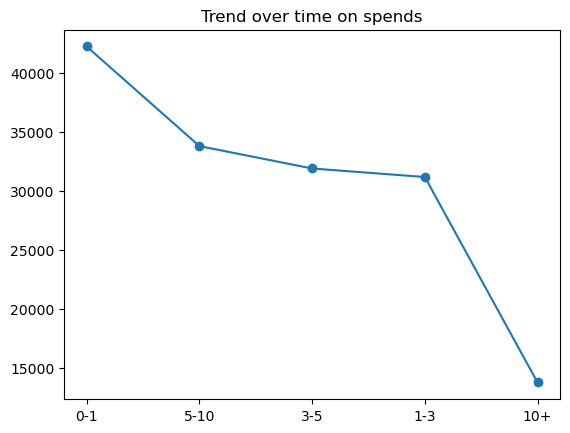

In [49]:


plt.plot(customer_spends.index,customer_spends.values,marker='o')
plt.title('Trend over time on spends');

#### Insight
No those who have been in the loyalty program for longer do not spend more. Those who have been in the program for early years 0-1 years  tend to spend more than those who just have been in the program for more than 10 years. Though there is an exception for customers who have been in the program for 5-10 years.

In [50]:
#6 #What is the average spend and items purchased in the first month by customers who joined as part of a promotion?
average_spend = clean_data.groupby('promotion').agg({
    'spend': 'mean', 
    'items_in_first_month': 'mean'  
}).sort_values('spend', ascending=False)
average_spend


,spend,items_in_first_month
promotion,,
No,123.131984,9.404724
Yes,122.122815,9.432079


In [51]:
df=clean_data['joining_month'].str.strip()!='Unknown'
filtered_clean_data=clean_data[df]
filtered_clean_data['joining_month']

0       Nov
1       Feb
2       Dec
3       Apr
4       Apr
       ... 
1238    Oct
1239    Apr
1240    Jan
1242    Jan
1243    Aug
Name: joining_month, Length: 1121, dtype: object

##### The average spend for customers who joined the loyalty program as part of promotion is 122.12 and the average item in the first month is  9.4044 for customers who joined as part of, while average spend for customers who did not join as part of a promotion is 123.13
  

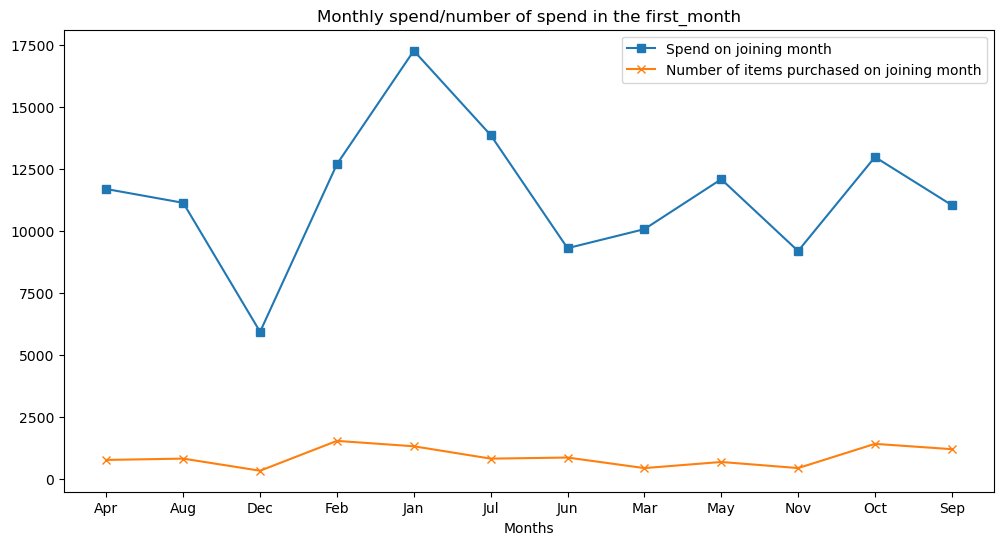

In [52]:
#Does the month a customer joins affect their total yearly spend or loyalty years?
df=clean_data['joining_month'].str.strip()!='Unknown'
filtered_clean_data=clean_data[df]


month_total=filtered_clean_data.groupby('joining_month')['spend'].sum()


first_month=filtered_clean_data.groupby('joining_month')['items_in_first_month'].sum()

# Creating a line plot to show the monthly trends on spending, spend on month of subscription and number of items purchased on first month
plt.figure(figsize = (12,6))
plt.plot(month_total.index, month_total.values, marker = "s")
plt.plot(first_month.index, first_month.values, marker = "x")
plt.xlabel("Months")
plt.legend(['Spend on joining month', "Number of items purchased on joining month"])
plt.title ("Monthly spend/number of spend in the first_month")
plt.savefig("month_spend")
plt.show()

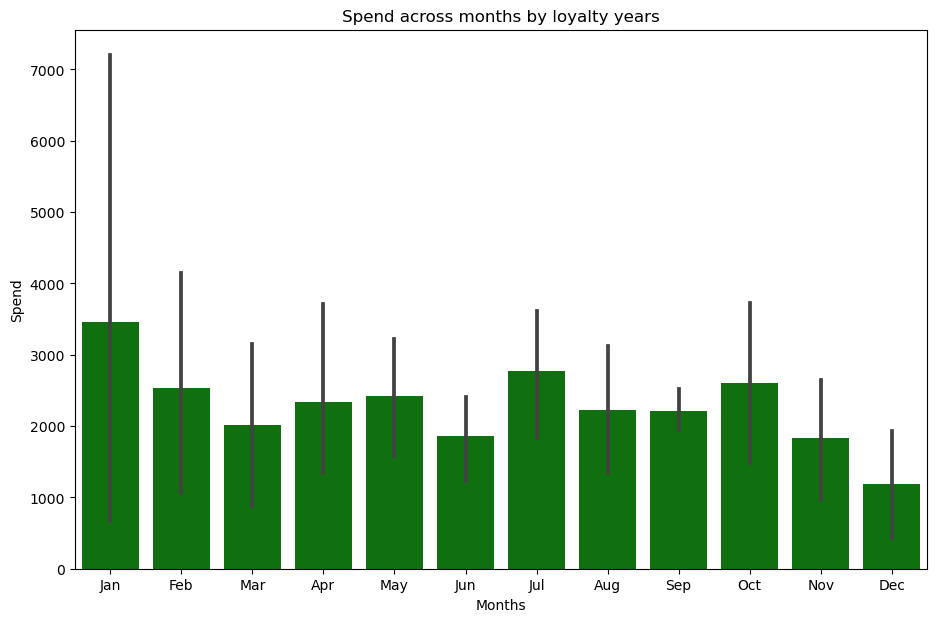

In [53]:
#Which customers show consistent spending patterns across months, and how does this relate to their loyalty years?
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_spend = {}

for month in months:
    filtered_data = clean_data[clean_data.joining_month == month]
    month_spend[month] = filtered_data.groupby('loyalty_years')['spend'].sum().sort_values(ascending=False)

# Storing the grouped monthly spend
monthly_spend = []

for month in months:
    filtered_data = clean_data[clean_data.joining_month == month]
    spend_data = filtered_data.groupby('loyalty_years')['spend'].sum().sort_values(ascending=False)
    spend_data.name = month 
    monthly_spend.append(spend_data)

# Combine all the series into a DataFrame
month_spend_d = pd.concat(month_spend, axis=1)
month_spend_d

plt.figure(figsize=(11,7))
sns.barplot(month_spend_d, color='green')
plt.title("Spend across months by loyalty years")
plt.xlabel('Months')
plt.ylabel("Spend")
plt.show()



#### Insight
Yes the month a customer joins affects there total yearly spend. For the customers that joined early during the year, they have more total spend than the rest of the customers that joined other months. But we can see that month like october also have high spend though it is towards the end of the year. Customers who have been part of the rogram for longer do not spend more.


In [54]:
#9 #Is there a trend of higher spending in customers with more loyalty
spend_trend=clean_data.groupby('loyalty_years')['spend'].sum()
spend_trend

loyalty_years
0-1     42232.95
1-3     31163.31
10+     13737.14
3-5     31884.94
5-10    33787.51
Name: spend, dtype: float64

In [55]:
spend_trend=clean_data.groupby('loyalty_years')['spend'].sum().sort_values(ascending=True)
spend_trend

loyalty_years
10+     13737.14
1-3     31163.31
3-5     31884.94
5-10    33787.51
0-1     42232.95
Name: spend, dtype: float64

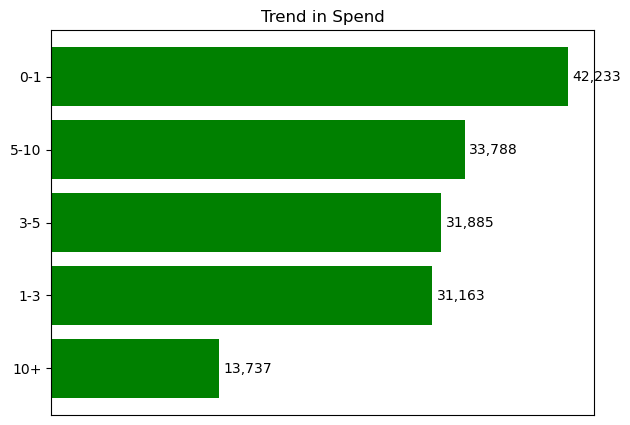

In [56]:
fig, ax = plt.subplots(figsize=(7,5))
bars = ax.barh(spend_trend.index, spend_trend.values,color='green')

#List comprehensions, formatting
ax.bar_label(bars, labels=[f'{value:,.0f}' for value in spend_trend], padding=3)
plt.xticks(ticks=[])

plt.title('Trend in Spend');


#### Insight
Customers with more loyalty years do not tend to spend more, we can see that those who are new to the program  spent more that those with higher years

In [57]:
#10 #What percentage of total spend comes from customers who have been in the loyalty program for more than 5 years?
spend_by_year=clean_data.groupby('loyalty_years')['spend'].sum()
spend_percent=(spend_by_year/clean_data['spend'].sum())*100
combined_percent=spend_percent['5-10'] + spend_percent['10+']
print(combined_percent)

31.10132890854637


#### Overall Insight

Insight:

	•	The customer with the highest spend is Customer 975, with a total spend of 142.29.
	•	The next four highest spenders have very similar total spend values, ranging from 141.82 to 142.02.
This suggests that while Customer 975 slightly outspent the others, the difference in total yearly spend among the top five customers is not very large.
This indicates that these top customers, though close in their total yearly spend, might be important to retain in the loyalty program as they provide a consistent revenue stream.

    The correlation value between first_month and spend is 0.102563, which indicates a slight positive correlation.

Insight:

	•	Slight Positive Correlation: This means that customers who spend more in their first month tend to have a slightly higher total yearly spend. However, since the correlation value is quite low (close to 0.1), this relationship is not very strong.
	sight:

	•	Loyalty Years and Spending: The plot shows a decreasing trend in customer spending as loyalty years increase.
	•	Customers with 0-1 years of loyalty have the highest total spend of 42,232.95.
	•	Customers with 3-5 years of loyalty spend slightly less, but still significant, at 31,688.94.
	•	There is a sharp drop in spending for customers with more than 5 years of loyalty, down to 19,327.14 for the +5 years group.
•	Early Loyalty: Customers in their first year of joining the loyalty program seem to spend the most, indicating either excitement for the program or initial incentives that drive higher spending.
	•	Decline Over Time: As customers remain in the program longer, their total spending decreases. This could indicate a lack of ongoing incentives or reduced engagement with the program after the initial years.
	Action needed: This trend suggests the need for targeted marketing or re-engagement campaigns to encourage spending from long-term customers (3+ years). Providing additional rewards or exclusive offers could potentially help boost their spending.

	•	Customers who joined without a promotion spend an average of 123.13 and purchased 9.40 items in the first month.
	•	Customers who joined with a promotion spend slightly less, with an average of 122.12, and purchased 9.43 items.

	•	The difference in spending between customers who joined with and without promotions is minimal (about 1 unit), suggesting that the promotion does not significantly impact the first-month spending.
	•	The number of items purchased in the first month is also quite close, indicating that the promotion may not have a strong influence on initial purchasing behavior.

Action

	•	Consider evaluating longer-term customer behavior to see if promotions have a more lasting effect beyond the first month.
	•	We can also want to analyze whether certain types of promotions (e.g., discounts vs. rewards) drive more  increases in spending or item purchases.

Overall, the promotion seems to have a limited immediate impact, but further analysis of retention and long-term spending trends would help in understanding the full effect of promotional offers.

   Customers who joined during the early year have more spend than those who joined later or towards the end of the year. 

